In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME", "STATUS", "SPECIAL_CONSIDERATIONS"], axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
application_df[application_df.columns].nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
values_count = application_df['APPLICATION_TYPE'].value_counts()
# Determine which values to replace if counts are less than ...?
replace_application = list(values_count[values_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Look at CLASSIFICATION value counts for binning
clasification_count = application_df['CLASSIFICATION'].value_counts()
# Determine which values to replace if counts are less than ..?
replace_class = list(clasification_count[clasification_count < 1250].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [6]:
application_df[application_df.columns].nunique()

APPLICATION_TYPE       9
AFFILIATION            6
CLASSIFICATION         6
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [7]:
application_df['ASK_AMT'].value_counts()

5000       25398
15583          3
6725           3
63981          3
10478          3
           ...  
75598          1
22336          1
44863          1
5928           1
6948863        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:>

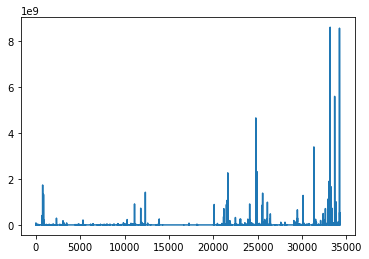

In [8]:
%matplotlib inline
application_df['ASK_AMT'].plot()

In [9]:
print(f'menor a 5000: {len(application_df.query("ASK_AMT <= 5000"))}')
print(f'mayor a 5000 menor a 30000: {len(application_df.query("ASK_AMT > 5000 and ASK_AMT < 30000"))}')
print(f'mayor a 30000: {len(application_df.query("ASK_AMT >= 30000 and ASK_AMT < 60000"))}')
print(f'mayor a 60000  menor a 100000: {len(application_df.query("ASK_AMT > 60000 and ASK_AMT < 100000"))}')
print(f'mayor a 100000 menor a 200000: {len(application_df.query("ASK_AMT >= 100000 and ASK_AMT < 200000"))}')
print(f'mayor a 200000 menor a 300000: {len(application_df.query("ASK_AMT >= 200000 and ASK_AMT < 500000"))}')
print(f'mayor a 300000 menor a 500000: {len(application_df.query("ASK_AMT >= 500000 and ASK_AMT < 2000000"))}')
print(f'mayor a 300000 menor a 500000: {len(application_df.query("ASK_AMT >= 2000000"))}')

menor a 5000: 25398
mayor a 5000 menor a 30000: 1993
mayor a 30000: 1351
mayor a 60000  menor a 100000: 1022
mayor a 100000 menor a 200000: 1131
mayor a 200000 menor a 300000: 1174
mayor a 300000 menor a 500000: 1136
mayor a 300000 menor a 500000: 1092


In [10]:
application_df.loc[(application_df['ASK_AMT'] <= 5000), 'ASK_AMT_cat'] = 'lower_equal_5000'

In [11]:
application_df.loc[(application_df['ASK_AMT'] > 5000) & (application_df['ASK_AMT'] < 30000), 'ASK_AMT_cat'] = '5000_to_30000'

In [12]:
application_df.loc[(application_df['ASK_AMT'] >= 30000) & (application_df['ASK_AMT'] < 60000), 'ASK_AMT_cat'] = '30000_to_60000'

In [13]:
application_df.loc[(application_df['ASK_AMT'] >= 60000) & (application_df['ASK_AMT'] < 100000), 'ASK_AMT_cat'] = '60000_to_100000'

In [14]:
application_df.loc[(application_df['ASK_AMT'] >= 100000) & (application_df['ASK_AMT'] < 200000), 'ASK_AMT_cat'] = '100000_to_200000'

In [15]:
application_df.loc[(application_df['ASK_AMT'] >= 200000) & (application_df['ASK_AMT'] < 500000), 'ASK_AMT_cat'] = '200000_to_500000'

In [16]:
application_df.loc[(application_df['ASK_AMT'] >= 500000) & (application_df['ASK_AMT'] < 2000000), 'ASK_AMT_cat'] = '500000_to_2000000'

In [17]:
application_df.loc[(application_df['ASK_AMT'] >= 2000000), 'ASK_AMT_cat'] = 'more_than_2000000'

In [18]:
application_df['ASK_AMT_cat'].value_counts()

lower_equal_5000     25398
5000_to_30000         1993
30000_to_60000        1351
200000_to_500000      1174
500000_to_2000000     1136
100000_to_200000      1131
more_than_2000000     1092
60000_to_100000       1024
Name: ASK_AMT_cat, dtype: int64

In [19]:
application_df.drop(["ASK_AMT"], axis=1, inplace=True)

In [20]:
# Generate our categorical variable lists
application_cat = ["APPLICATION_TYPE", "AFFILIATION", "USE_CASE", "ORGANIZATION","INCOME_AMT", "ASK_AMT_cat", "CLASSIFICATION"]

In [21]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ASK_AMT_cat_5000_to_30000,ASK_AMT_cat_60000_to_100000,ASK_AMT_cat_lower_equal_5000,ASK_AMT_cat_more_than_2000000,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Merge one-hot encoded features and drop the originals
merged_df = application_df.merge(encode_df, left_index=True, right_index=True)
merged_df = merged_df.drop(application_cat,1)
merged_df.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ASK_AMT_cat_5000_to_30000,ASK_AMT_cat_60000_to_100000,ASK_AMT_cat_lower_equal_5000,ASK_AMT_cat_more_than_2000000,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Split our preprocessed data into our features and target arrays
y = merged_df["IS_SUCCESSFUL"].values
X = merged_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [24]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [26]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [27]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([1, 1, 1, ..., 1, 0, 0])

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,2608,1395
Actual 1,981,3591


In [29]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7229154518950437

In [30]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2608,1395
Actual 1,981,3591


Accuracy Score : 0.7229154518950437
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      4003
           1       0.72      0.79      0.75      4572

    accuracy                           0.72      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.72      0.72      0.72      8575



In [31]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, merged_df.columns), reverse=True)

[(0.20144342306331275, 'APPLICATION_TYPE_T8'),
 (0.19014572325972381, 'AFFILIATION_Family/Parent'),
 (0.043883710885047264, 'USE_CASE_ProductDev'),
 (0.0425486624695867, 'APPLICATION_TYPE_T4'),
 (0.0359554432434751, 'APPLICATION_TYPE_Other'),
 (0.03197917167092179, 'ORGANIZATION_Corporation'),
 (0.027881785124677514, 'CLASSIFICATION_C2000'),
 (0.02770296384396567, 'CLASSIFICATION_C3000'),
 (0.02695396783948965, 'CLASSIFICATION_C1200'),
 (0.026816912709306133, 'APPLICATION_TYPE_T10'),
 (0.0254613274979951, 'ASK_AMT_cat_more_than_2000000'),
 (0.023857634168024312, 'APPLICATION_TYPE_T19'),
 (0.02366268019822592, 'APPLICATION_TYPE_T3'),
 (0.01867846042292664, 'APPLICATION_TYPE_T5'),
 (0.017796352359249826, 'ASK_AMT_cat_60000_to_100000'),
 (0.017335708525743836, 'USE_CASE_Other'),
 (0.015121470754557543, 'CLASSIFICATION_C1000'),
 (0.015024856465189505, 'USE_CASE_Preservation'),
 (0.0146758469662329, 'INCOME_AMT_1M-5M'),
 (0.013057417327320962, 'ASK_AMT_cat_lower_equal_5000'),
 (0.0117826360

In [32]:
X

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])